# ARX Modelling

### Load Libraries & Packages

In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy.signal import cont2discrete
import pickle
import matplotlib.pyplot as plt
import pygad

### Import and visualize Data

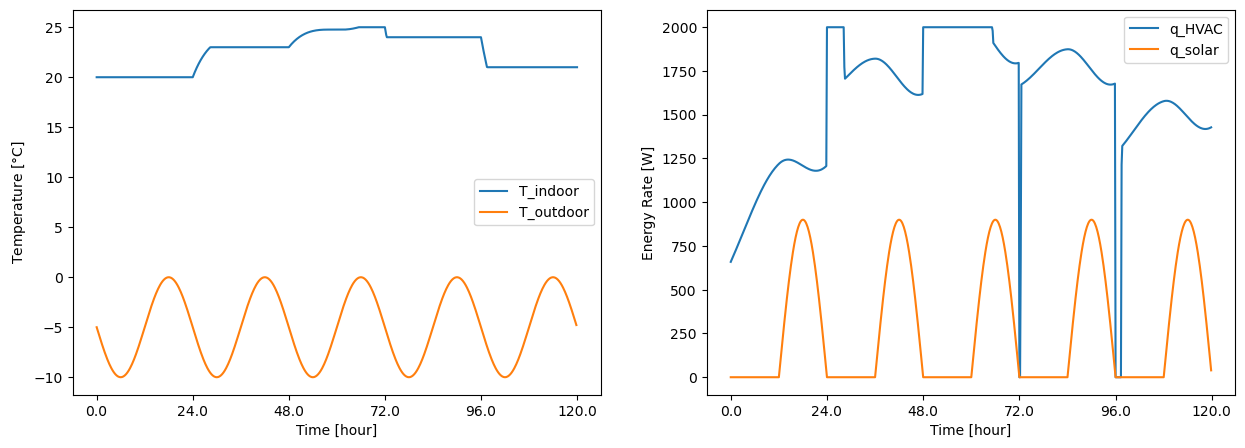

In [2]:
with open('HW1_Data.pickle', 'rb') as f:
    Data = pickle.load(f)
Ti = Data['Ti'] # indoor air temperature in degC
To = Data['To'] # outdoor air temperature in degC
q_HVAC = Data['q_HVAC'] # HVAC heating rate in W
q_solar = Data['q_solar'] # absorbed solar radiation in W
N = To.shape[0] # number of timesteps

t_span = np.arange(0,N+1)
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(Ti, label='T_indoor')
ax[0].plot(To, label='T_outdoor')
ax[0].set_xticks(t_span[::6*24],t_span[::6*24]*10/60)
ax[0].set_ylabel('Temperature [$\degree$C]')
ax[0].set_xlabel('Time [hour]')
ax[0].legend()

ax[1].plot(q_HVAC, label='q_HVAC')
ax[1].plot(q_solar, label='q_solar')
ax[1].set_xticks(t_span[::6*24],t_span[::6*24]*10/60)
ax[1].set_ylabel('Energy Rate [W]')
ax[1].set_xlabel('Time [hour]')
ax[1].legend()

plt.show()

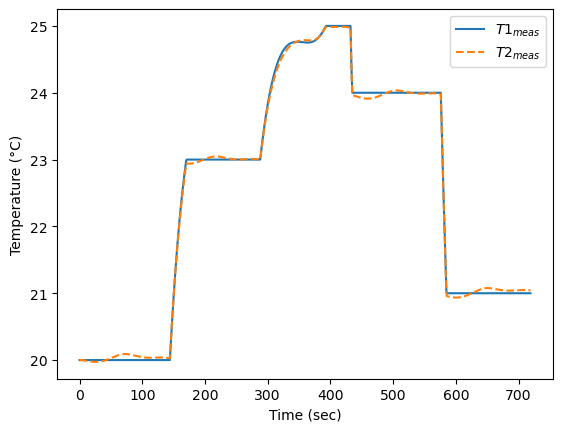

In [3]:
from gekko import GEKKO
m = GEKKO()

y = Ti[:,None][:-1,:]
u = np.concatenate((q_HVAC[:,None],q_solar[:,None]),axis=1)
t = np.arange(0,N)[:,None]

na = 3 # Number of A coefficients
nb = 2 # Number of B coefficients
yp,p,K = m.sysid(t,u,y,na,nb,shift='calc',pred='meas')

plt.plot(t,y)
plt.plot(t,yp,'--')
plt.legend([r'$T1_{meas}$',r'$T2_{meas}$',\
            r'$T1_{pred}$',r'$T2_{pred}$'])
plt.ylabel('Temperature (°C)')
plt.xlabel('Time (sec)')
plt.show()